In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utility import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [3]:
FEcalculator

<function utility.FEcalculator(Sn_percent, Pot, cDen, pH)>

In [4]:
data = pd.read_csv('../../data/cleaned_data.csv')
data.drop(columns=['S/N', 'C2H4', 'CO', 'H2', 'EtoH', 'FORM'], inplace=True)
data.head()

,cDen,Pot,Sn %,pH,weight,Cu %
0,150,3.5,1.00,14.05,118.7100,0.00
1,150,3.3,0.80,14.05,107.6772,0.20
2,150,3.2,0.50,14.05,91.1280,0.50
3,150,3.1,0.10,14.05,69.0624,0.90
4,150,3.0,0.05,14.05,66.3042,0.95


In [5]:
data.columns

Index(['cDen', 'Pot', 'Sn %', 'pH', 'weight', 'Cu %'], dtype='object')

In [6]:
# cols = [
#         r'$\rm Current density$',
#         r'$\rm Potential$',
#         r'$\rm Sn \%$',
#         r'$\rm pH$',
#         r'$\rm Weight$',
#         r'$\rm Cu \%$'
#         ]

# data.columns = cols

In [7]:
data['Cu %'] /= 1.00
data['weight'] /= 118.71
data['Pot'] /= 4.70
data['pH'] /= 14.05
data['cDen'] /= 450.00

In [8]:
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 200

In [9]:
data.head()

,cDen,Pot,Sn %,pH,weight,Cu %
0,0.333333,0.744681,1.00,1.0,1.000000,0.00
1,0.333333,0.702128,0.80,1.0,0.907061,0.20
2,0.333333,0.680851,0.50,1.0,0.767652,0.50
3,0.333333,0.659574,0.10,1.0,0.581774,0.90
4,0.333333,0.638298,0.05,1.0,0.558539,0.95


## ethane FE

In [10]:
ethane

<function utility.ethane(Sn_percent, Pot, weight, pH, Cu_percent, cDen)>

In [11]:
def f_ethane(df):

    # the ethane function takes Sn_percent, Pot, weight, pH, Cu_percent, cDen
    input = np.asarray(df[['Sn %', 'Pot', 'weight', 'pH', 'Cu %', 'cDen']])

    out = ethane(input[:, 0], input[:, 1], input[:, 2], input[:, 3], input[:, 4], input[:, 5])

    return out

ethane_explainer = shap.explainers.Exact(f_ethane, data[['Sn %', 'Pot', 'weight', 'pH', 'Cu %', 'cDen']])

shap_values = ethane_explainer(data[['Sn %', 'Pot', 'weight', 'pH', 'Cu %', 'cDen']])
    

Text(0.5, 0, '$\\rm Feature \\ Importance$')

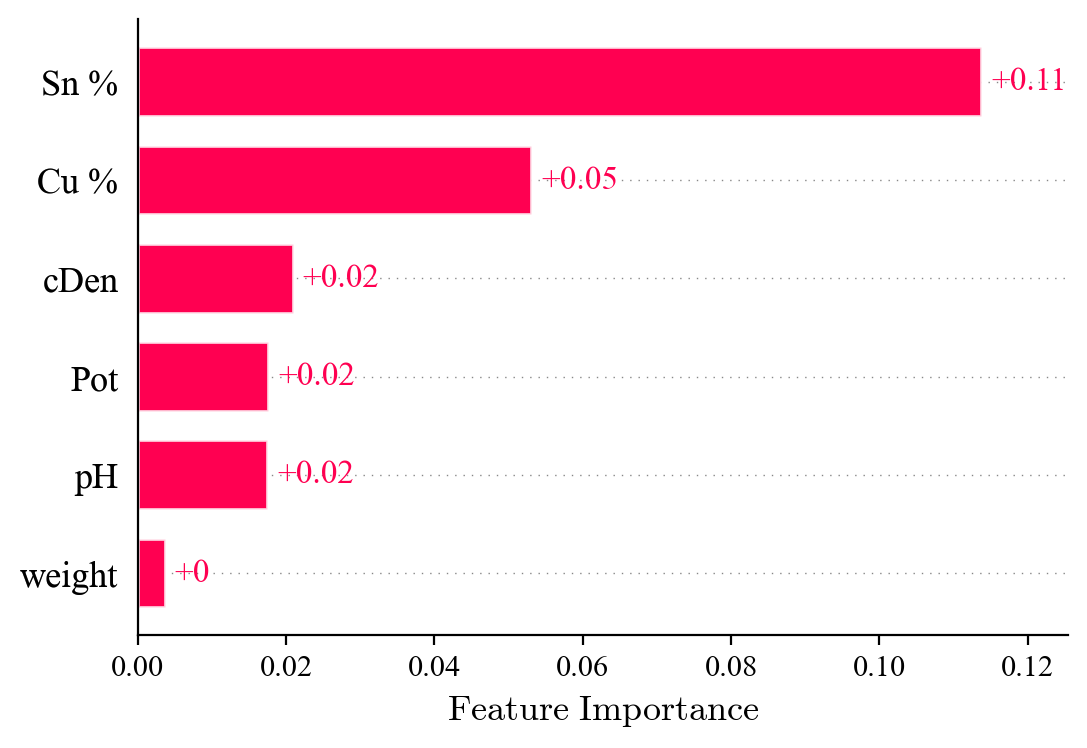

In [12]:
shap.plots.bar(shap_values, show=False)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.xlabel(r'$\rm Feature \ Importance$')

## CO

In [13]:
carbonmono

<function utility.carbonmono(Sn, Cu, Pot, pH, cDen)>

In [14]:
def f_carbonmono(df):

    # the ethane function takes Sn_percent, Pot, weight, pH, Cu_percent, cDen
    input = np.asarray(df[['Sn %', 'Cu %', 'Pot', 'pH', 'cDen']])

    out = carbonmono(input[:, 0], input[:, 1], input[:, 2], input[:, 3], input[:, 4])

    return out

carbonmono_explainer = shap.explainers.Exact(f_carbonmono, data[['Sn %', 'Cu %', 'Pot', 'pH', 'cDen']])

carbonmono_shap_values = carbonmono_explainer(data[['Sn %', 'Cu %', 'Pot', 'pH', 'cDen']])
    

Text(0.5, 0, '$\\rm Feature \\ Importance$')

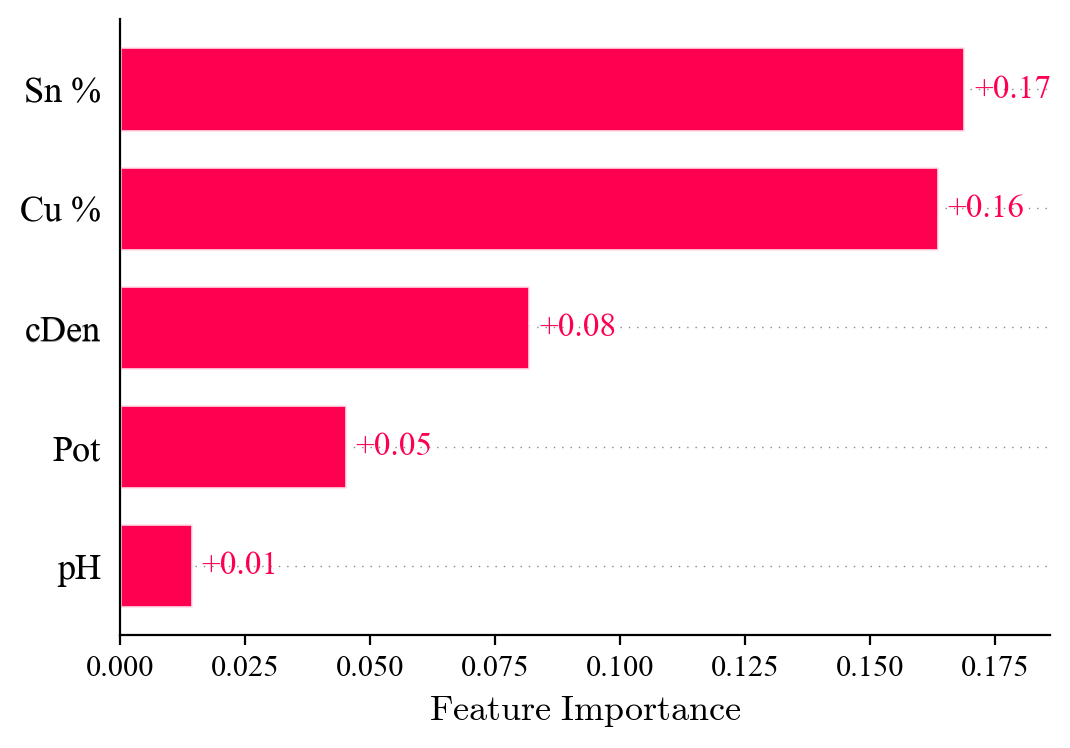

In [15]:
shap.plots.bar(carbonmono_shap_values, show=False)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.xlabel(r'$\rm Feature \ Importance$')

## 3. Ethanol

In [16]:
ethanol

<function utility.ethanol(Cu, weight, Pot, cDen, Sn, pH)>

In [17]:
col = ['Cu %', 'weight', 'Pot', 'cDen', 'Sn %', 'pH']

def f_ethanol(df):

    # the ethane function takes Sn_percent, Pot, weight, pH, Cu_percent, cDen
    input = np.asarray(df[col])

    out = ethanol(input[:, 0], input[:, 1], input[:, 2], input[:, 3], input[:, 4], input[:, 5])

    return out

ethanol_explainer = shap.explainers.Exact(f_ethanol, data[col])

ethanol_shap_values = ethanol_explainer(data[col])
    

Text(0.5, 0, '$\\rm Feature \\ Importance$')

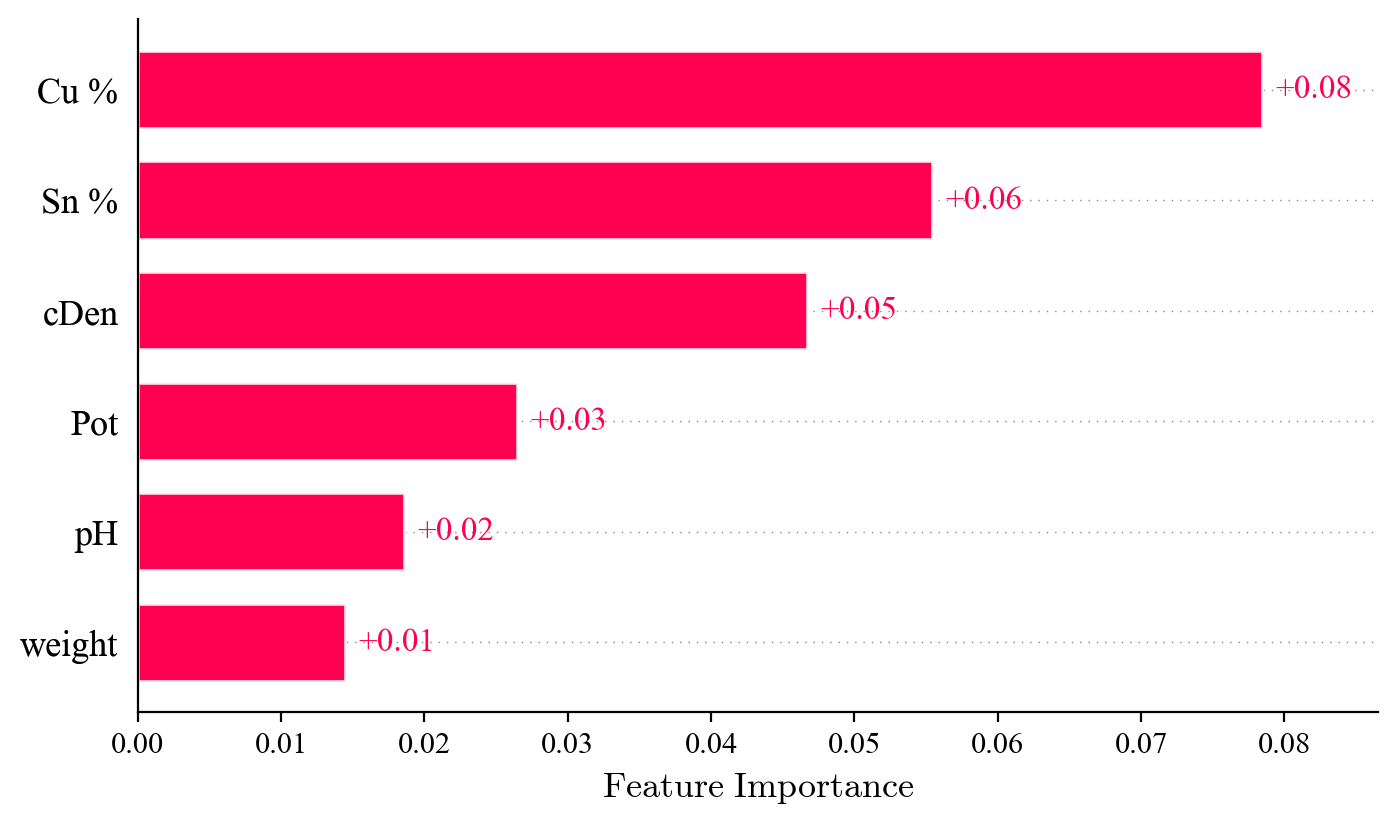

In [18]:
shap.plots.bar(ethanol_shap_values, show=False)
plt.xlabel(r'$\rm Feature \ Importance$')

# 4. Formate

In [19]:
formate

<function utility.formate(weight, Sn_percent, Cu_percent, Pot, cDen, pH)>

In [20]:
col = ['weight', 'Sn %', 'Cu %', 'Pot', 'cDen', 'pH']

def f_formate(df):

    # the ethane function takes Sn_percent, Pot, weight, pH, Cu_percent, cDen
    input = np.asarray(df[col])

    out = formate(input[:, 0], input[:, 1], input[:, 2], input[:, 3], input[:, 4], input[:, 5])

    return out

formate_explainer = shap.explainers.Exact(f_formate, data[col])

formate_shap_values = formate_explainer(data[col])
    

Text(0.5, 0, '$\\rm Feature \\ Importance$')

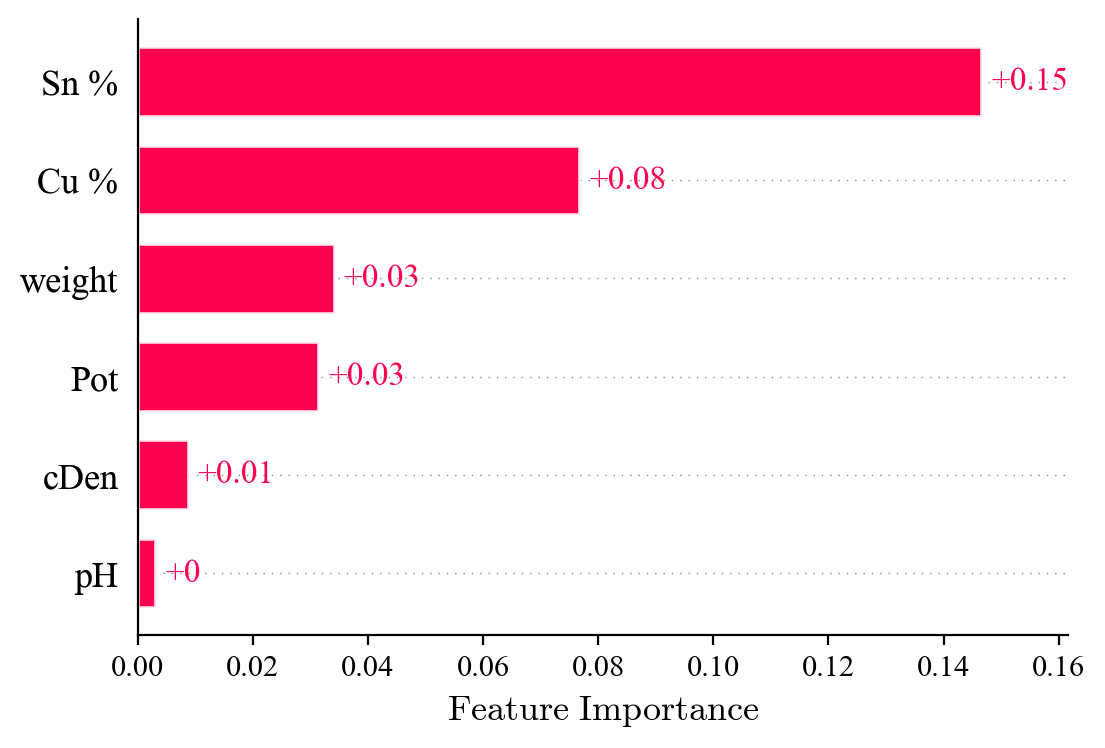

In [21]:
shap.plots.bar(formate_shap_values, show=False)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.xlabel(r'$\rm Feature \ Importance$')

# 5. H2

In [22]:
hydrogen

<function utility.hydrogen(Sn, Cu, Pot, pH, cDen, weight)>

In [23]:
col = ['Sn %', 'Cu %', 'Pot', 'pH', 'cDen', 'weight']

def f_hydrogen(df):

    # the ethane function takes Sn_percent, Pot, weight, pH, Cu_percent, cDen
    input = np.asarray(df[col])

    out = hydrogen(input[:, 0], input[:, 1], input[:, 2], input[:, 3], input[:, 4], input[:, 5])

    return out

hydrogen_explainer = shap.explainers.Exact(f_hydrogen, data[col])

hydrogen_shap_values = hydrogen_explainer(data[col])
    

Text(0.5, 0, '$\\rm Feature \\ Importance$')

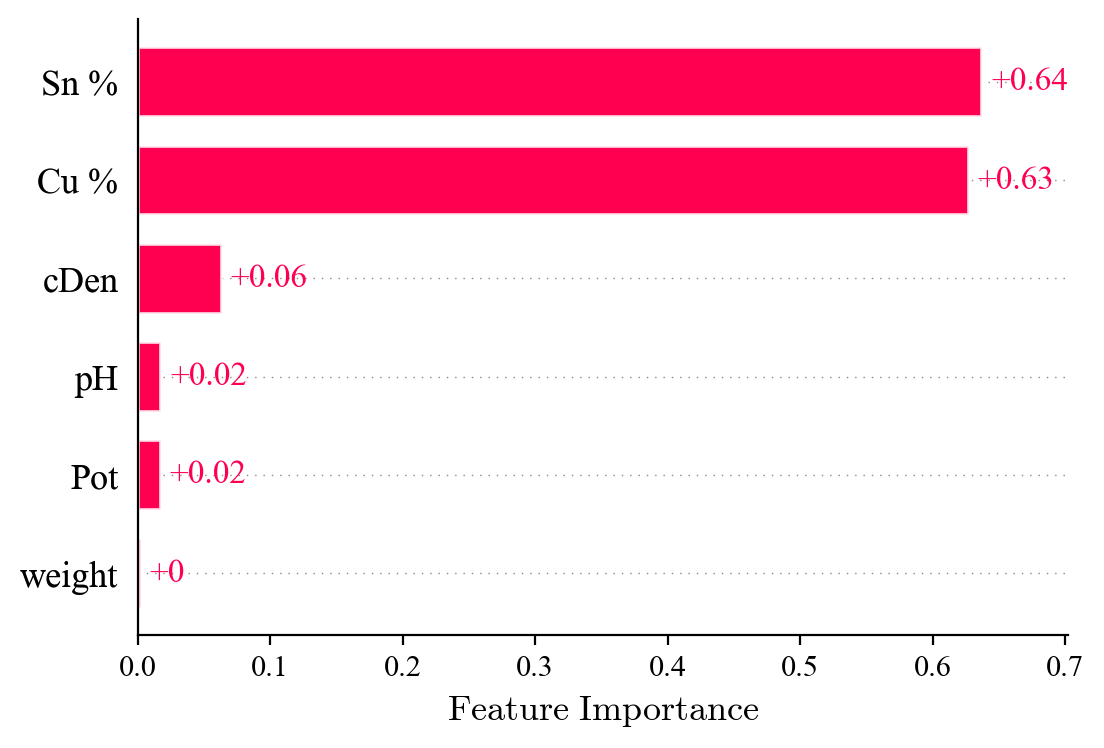

In [24]:
shap.plots.bar(hydrogen_shap_values, show=False)
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.xlabel(r'$\rm Feature \ Importance$')